In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/input_data.csv', sep=';')
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          int64  
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.3+ GB


In [4]:
df.isnull().sum()

date                   0
price                  0
level                  0
levels                 0
rooms                  0
area                   0
kitchen_area           0
geo_lat                0
geo_lon                0
building_type          0
object_type            0
postal_code       507771
street_id        4205554
id_region              0
house_id         3261943
dtype: int64

In [5]:
df.isnull().sum() / len(df) * 100

date              0.000000
price             0.000000
level             0.000000
levels            0.000000
rooms             0.000000
area              0.000000
kitchen_area      0.000000
geo_lat           0.000000
geo_lon           0.000000
building_type     0.000000
object_type       0.000000
postal_code       4.470543
street_id        37.026752
id_region         0.000000
house_id         28.718964
dtype: float64

In [6]:
df.drop(['house_id', 'street_id'], axis=1, inplace=True)
df['postal_code'] = df['postal_code'].fillna('uncnown')
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,id_region
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,66
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,1
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,50
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,1
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,23


In [7]:
import matplotlib.pyplot as plt
import numpy as np

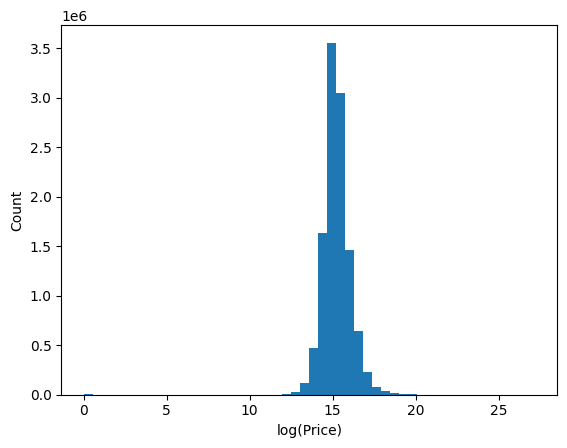

In [8]:
plt.hist(np.log1p(df['price']), bins=50)
plt.xlabel('log(Price)')
plt.ylabel('Count');


In [9]:
zxc = df[(df['price'] >= 100000) & (df['price'] < 100000000)]
zxc['price'].describe()

count    1.131693e+07
mean     5.876887e+06
std      6.938597e+06
min      1.000000e+05
25%      2.600000e+06
50%      3.990000e+06
75%      6.490000e+06
max      1.000000e+08
Name: price, dtype: float64

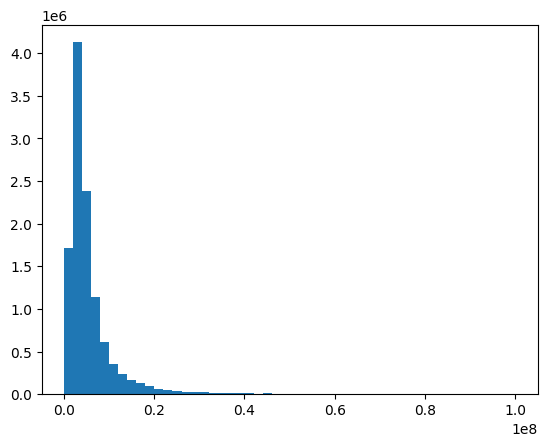

In [10]:
plt.hist(zxc['price'], bins=50);

C:\Users\aleks\AppData\Local\Temp\ipykernel_7164\2924754744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zxc['price'] = np.log1p(zxc['price'])


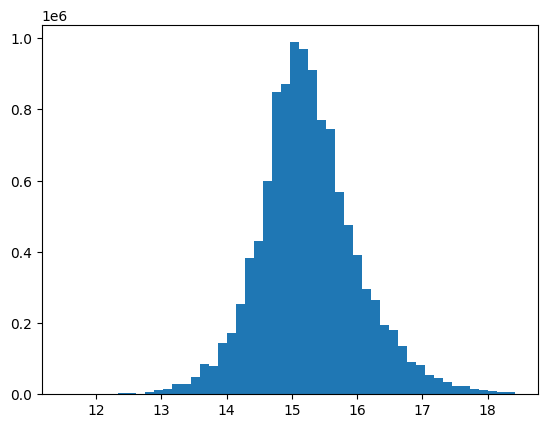

In [11]:
zxc['price'] = np.log1p(zxc['price'])
plt.hist(zxc['price'], bins=50);

In [12]:
import seaborn as sns

In [13]:
zxc.head()


,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,id_region
0,2021-01-01,14.712129,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,66
1,2021-01-01,14.187075,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,1
2,2021-01-01,16.185754,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,50
3,2021-01-01,14.946913,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,1
4,2021-01-01,14.731802,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,23


In [14]:
from sklearn.cluster import KMeans

coords = zxc[['geo_lat', 'geo_lon']]

kmeans = KMeans(n_clusters=10, random_state=42)
zxc['cluster'] = kmeans.fit_predict(coords)
zxc.drop(['geo_lat', 'geo_lon'], axis=1, inplace=True)


C:\Users\aleks\AppData\Local\Temp\ipykernel_7164\1643782351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zxc['cluster'] = kmeans.fit_predict(coords)
C:\Users\aleks\AppData\Local\Temp\ipykernel_7164\1643782351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zxc.drop(['geo_lat', 'geo_lon'], axis=1, inplace=True)


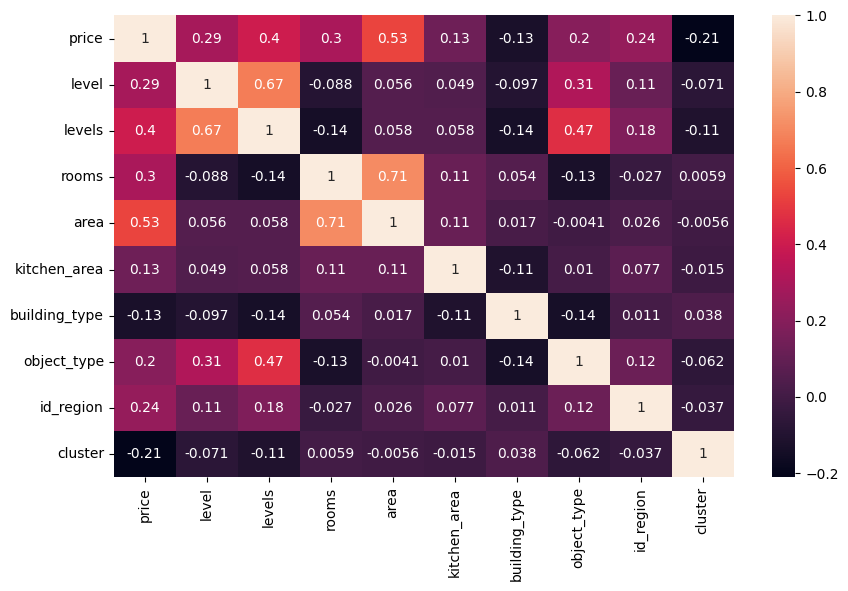

In [15]:
num_zxc = zxc.select_dtypes(include=['int64', 'float64', 'Int32'])
corr_matrix = num_zxc.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True);

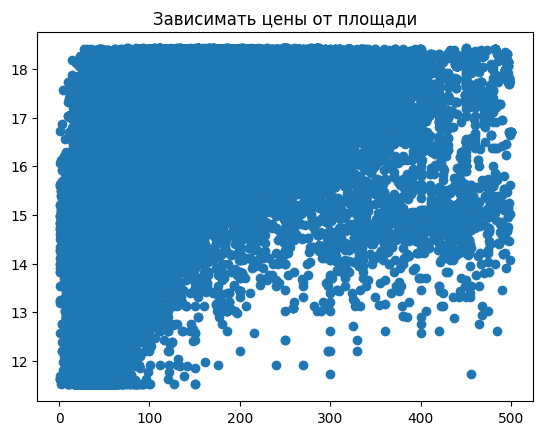

In [16]:
plt.scatter(zxc['area'], zxc['price'])
plt.title('Зависимать цены от площади');

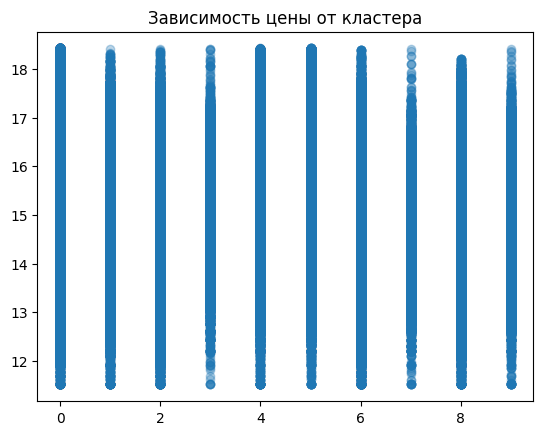

In [17]:
plt.scatter(zxc['cluster'], zxc['price'], alpha=0.3)
plt.title('Зависимость цены от кластера');


In [18]:
zxc.groupby('cluster')['price'].mean().sort_values()


cluster
8    14.779548
2    14.890403
1    15.016988
6    15.037692
9    15.040201
7    15.056196
3    15.242948
4    15.261235
0    15.611736
5    15.618942
Name: price, dtype: float64

In [19]:
zxc.head()

,date,price,level,levels,rooms,area,kitchen_area,building_type,object_type,postal_code,id_region,cluster
0,2021-01-01,14.712129,15,31,1,30.3,0.0,0,2,620000.0,66,6
1,2021-01-01,14.187075,5,5,1,33.0,6.0,0,0,385000.0,1,4
2,2021-01-01,16.185754,4,13,3,85.0,12.0,3,0,142701.0,50,0
3,2021-01-01,14.946913,3,5,3,82.0,9.0,0,0,385000.0,1,4
4,2021-01-01,14.731802,2,3,1,30.0,9.0,3,2,353960.0,23,4


In [20]:
categorical_columns = ['cluster', 'object_type', 'building_type']
encode_df = pd.get_dummies(zxc, columns=categorical_columns, drop_first=True)
encode_df.head()

,date,price,level,levels,rooms,area,kitchen_area,postal_code,id_region,cluster_1,...,cluster_7,cluster_8,cluster_9,object_type_2,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,building_type_6
0,2021-01-01,14.712129,15,31,1,30.3,0.0,620000.0,66,False,...,False,False,False,True,False,False,False,False,False,False
1,2021-01-01,14.187075,5,5,1,33.0,6.0,385000.0,1,False,...,False,False,False,False,False,False,False,False,False,False
2,2021-01-01,16.185754,4,13,3,85.0,12.0,142701.0,50,False,...,False,False,False,False,False,False,True,False,False,False
3,2021-01-01,14.946913,3,5,3,82.0,9.0,385000.0,1,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-01-01,14.731802,2,3,1,30.0,9.0,353960.0,23,False,...,False,False,False,True,False,False,True,False,False,False


In [21]:
from sklearn.preprocessing import StandardScaler
num_columns = ['area', 'rooms', 'kitchen_area', 'levels', 'level', 'id_region']
scaler = StandardScaler()
encode_df[num_columns] = scaler.fit_transform(encode_df[num_columns])
encode_df.head()

,date,price,level,levels,rooms,area,kitchen_area,postal_code,id_region,cluster_1,...,cluster_7,cluster_8,cluster_9,object_type_2,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,building_type_6
0,2021-01-01,14.712129,1.623587,2.664754,-0.619634,-0.877871,0.081366,620000.0,0.657841,False,...,False,False,False,True,False,False,False,False,False,False
1,2021-01-01,14.187075,-0.270081,-0.937488,-0.619634,-0.771991,0.267049,385000.0,-2.231354,False,...,False,False,False,False,False,False,False,False,False,False
2,2021-01-01,16.185754,-0.459448,0.170894,1.117887,1.267185,0.452732,142701.0,-0.053346,False,...,False,False,False,False,False,False,True,False,False,False
3,2021-01-01,14.946913,-0.648815,-0.937488,1.117887,1.149540,0.359891,385000.0,-2.231354,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-01-01,14.731802,-0.838182,-1.214583,-0.619634,-0.889636,0.359891,353960.0,-1.253473,False,...,False,False,False,True,False,False,True,False,False,False


In [22]:
encode_df['price'].describe()

count    1.131693e+07
mean     1.525287e+01
std      7.648901e-01
min      1.151294e+01
25%      1.477102e+01
50%      1.519930e+01
75%      1.568577e+01
max      1.842068e+01
Name: price, dtype: float64

In [23]:
encode_df = encode_df.drop('date', axis=1)

In [24]:
encode_df = encode_df.drop('postal_code', axis=1)

In [25]:
encode_df.head()

,price,level,levels,rooms,area,kitchen_area,id_region,cluster_1,cluster_2,cluster_3,...,cluster_7,cluster_8,cluster_9,object_type_2,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,building_type_6
0,14.712129,1.623587,2.664754,-0.619634,-0.877871,0.081366,0.657841,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,14.187075,-0.270081,-0.937488,-0.619634,-0.771991,0.267049,-2.231354,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16.185754,-0.459448,0.170894,1.117887,1.267185,0.452732,-0.053346,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,14.946913,-0.648815,-0.937488,1.117887,1.149540,0.359891,-2.231354,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,14.731802,-0.838182,-1.214583,-0.619634,-0.889636,0.359891,-1.253473,False,False,False,...,False,False,False,True,False,False,True,False,False,False


#### Sklearn

In [26]:
from sklearn.model_selection import train_test_split

X = encode_df.drop('price', axis=1)
y = encode_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9053547, 22), (2263387, 22), (9053547,), (2263387,))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

qwe = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Логарифмы: {qwe}")

rub = np.expm1(qwe)
print(f"В рублях: {rub}")

Логарифмы: 0.5096819606305409
В рублях: 0.6647616509966554


In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

qwe_ridge= np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Логарифмы: {qwe_ridge}")

rub_ridge = np.expm1(qwe_ridge)
print(f"В рублях: {rub_ridge}")

Логарифмы: 0.5096819597145492
В рублях: 0.6647616494717474


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sample = encode_df.sample(200_000, random_state=42)
X_sample = sample.drop(columns=['price'])
y_sample = sample['price']

model_RFR = RandomForestRegressor(
    n_estimators=100,       
    max_depth=15,           
    n_jobs=-1,              
    random_state=42)
model_RFR.fit(X_sample, y_sample)

y_pred_RFR = model_RFR.predict(X_test)

qwe_RFR = np.sqrt(mean_squared_error(y_test, y_pred_RFR))
print(f"Логарифмы: {qwe_RFR}")

rub_RFR = np.expm1(qwe_RFR)
print(f"В рублях: {rub_RFR}")

Логарифмы: 0.31884237941052446
В рублях: 0.3755344952600931


In [32]:
importances = model_RFR.feature_importances_


feat_imp = pd.DataFrame({
    'feature': X_sample.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp)

            feature  importance
5         id_region    0.448196
3              area    0.343328
1            levels    0.121456
4      kitchen_area    0.019259
9         cluster_4    0.014361
2             rooms    0.009819
0             level    0.008102
8         cluster_3    0.004114
15    object_type_2    0.004109
19  building_type_4    0.004031
11        cluster_6    0.004025
10        cluster_5    0.003985
13        cluster_8    0.003947
17  building_type_2    0.002708
12        cluster_7    0.002321
7         cluster_2    0.001516
6         cluster_1    0.001448
18  building_type_3    0.001273
20  building_type_5    0.000648
14        cluster_9    0.000631
16  building_type_1    0.000471
21  building_type_6    0.000253


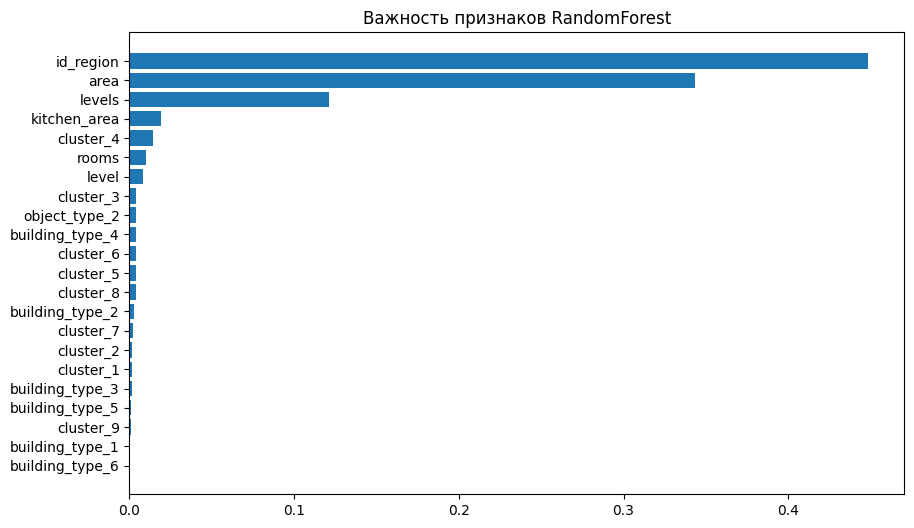

In [33]:
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis() 
plt.title('Важность признаков RandomForest');


#### CatBoost

In [ ]:
df_cat = zxc.drop(['date', 'postal_code'], axis=1)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11316934 entries, 0 to 11358149
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          float64
 1   level          int64  
 2   levels         int64  
 3   rooms          int64  
 4   area           float64
 5   kitchen_area   float64
 6   building_type  int64  
 7   object_type    int64  
 8   id_region      int64  
 9   cluster        int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 1.1 GB


In [43]:
df_cat.head()

,price,level,levels,rooms,area,kitchen_area,building_type,object_type,id_region,cluster
0,14.712129,15,31,1,30.3,0.0,0,2,66,6
1,14.187075,5,5,1,33.0,6.0,0,0,1,4
2,16.185754,4,13,3,85.0,12.0,3,0,50,0
3,14.946913,3,5,3,82.0,9.0,0,0,1,4
4,14.731802,2,3,1,30.0,9.0,3,2,23,4


In [66]:
X = df_cat.drop(['price'], axis=1)
y = df_cat['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9053547, 9), (2263387, 9), (9053547,), (2263387,))

In [45]:
cat_features = ['object_type', 'building_type', 'cluster']

In [46]:
from catboost import CatBoostRegressor

model_cb = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE', 
    random_seed=42,
    verbose=100
)

In [47]:
model_cb.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)

0:	learn: 0.7194912	test: 0.7195725	best: 0.7195725 (0)	total: 2.55s	remaining: 42m 27s
100:	learn: 0.3440421	test: 0.3433980	best: 0.3433980 (100)	total: 3m 25s	remaining: 30m 31s
200:	learn: 0.3300378	test: 0.3294667	best: 0.3294667 (200)	total: 6m 50s	remaining: 27m 11s
300:	learn: 0.3246125	test: 0.3240703	best: 0.3240703 (300)	total: 10m 14s	remaining: 23m 46s
400:	learn: 0.3213414	test: 0.3208261	best: 0.3208261 (400)	total: 13m 39s	remaining: 20m 24s
500:	learn: 0.3191103	test: 0.3186268	best: 0.3186268 (500)	total: 17m 7s	remaining: 17m 3s
600:	learn: 0.3173143	test: 0.3168649	best: 0.3168649 (600)	total: 20m 33s	remaining: 13m 38s
700:	learn: 0.3159545	test: 0.3155146	best: 0.3155146 (700)	total: 24m 1s	remaining: 10m 14s
800:	learn: 0.3147332	test: 0.3143156	best: 0.3143156 (800)	total: 27m 28s	remaining: 6m 49s
900:	learn: 0.3136671	test: 0.3132651	best: 0.3132651 (900)	total: 30m 53s	remaining: 3m 23s
999:	learn: 0.3128104	test: 0.3124220	best: 0.3124220 (999)	total: 34m 16

In [67]:
y_pred = model_cb.predict(X_test)
rmse_log_cat = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rub_cat = np.expm1(rmse_log_cat)
print(f"RMSE в логарифмах: {rmse_log_cat}")
print(f"RMSE в рублях: {rmse_rub_cat}")

RMSE в логарифмах: 0.3124220367315789
RMSE в рублях: 0.36673138217439843


In [49]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_cb.get_feature_importance()
}).sort_values(by='importance', ascending=False)

In [50]:
feature_importances

,feature,importance
7,id_region,46.295206
3,area,22.578393
1,levels,15.073497
8,cluster,11.190847
5,building_type,1.544565
4,kitchen_area,1.505259
6,object_type,0.805621
2,rooms,0.697005
0,level,0.309607


In [52]:
import xgboost as xgb

In [68]:
X = encode_df.drop(['price'], axis=1)
y = encode_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9053547, 22), (2263387, 22), (9053547,), (2263387,))

In [ ]:
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42,
    eval_metric='rmse'
)

In [60]:
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=50
)

[0]	validation_0-rmse:0.74238
[50]	validation_0-rmse:0.35660
[100]	validation_0-rmse:0.32663
[150]	validation_0-rmse:0.31827
[200]	validation_0-rmse:0.31332
[250]	validation_0-rmse:0.31089
[300]	validation_0-rmse:0.30927
[350]	validation_0-rmse:0.30796
[400]	validation_0-rmse:0.30663
[450]	validation_0-rmse:0.30573
[499]	validation_0-rmse:0.30492


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


In [69]:
y_pred_xgb = model_xgb.predict(X_test)

rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_rub_xgb = np.expm1(rmse_log_xgb)

print(f"RMSE в логарифмах: {rmse_log_xgb}")
print(f"RMSE в рублях: {rmse_rub_xgb}")

RMSE в логарифмах: 0.3049174025168589
RMSE в рублях: 0.3565129538229635


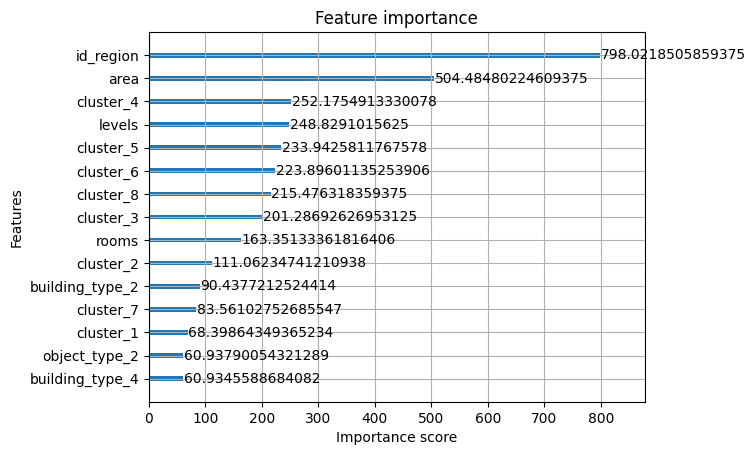

In [62]:
from xgboost import plot_importance

plot_importance(model_xgb, importance_type='gain', max_num_features=15)
plt.show()

In [70]:
print(qwe, rub)
print(qwe_ridge, rub_ridge)
print(qwe_RFR, rub_RFR)
print(rmse_log_cat, rmse_rub_cat)
print(rmse_log_xgb, rmse_rub_xgb)

0.5096819606305409 0.6647616509966554
0.5096819597145492 0.6647616494717474
0.31884237941052446 0.3755344952600931
0.3124220367315789 0.36673138217439843
0.3049174025168589 0.3565129538229635


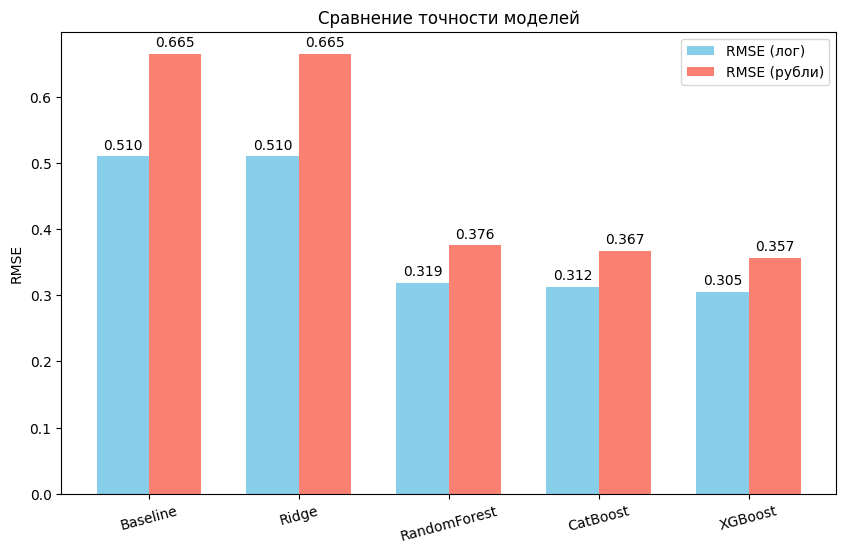

In [ ]:
rmse_log = [
    qwe,            
    qwe_ridge,      
    qwe_RFR,        
    rmse_log_cat,   
    rmse_log_xgb    
]

rmse_rub = [
    rub,
    rub_ridge,
    rub_RFR,
    rmse_rub_cat,
    rmse_rub_xgb
]

models = ["Baseline", "Ridge", "RandomForest", "CatBoost", "XGBoost"]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, rmse_log, width, label="RMSE (лог)", color="skyblue")
bars2 = ax.bar(x + width/2, rmse_rub, width, label="RMSE (рубли)", color="salmon")

ax.set_ylabel("RMSE")
ax.set_title("Сравнение точности моделей")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()

for bar in bars1 + bars2:
    h = bar.get_height()
    ax.annotate(f'{h:.3f}',
                xy=(bar.get_x() + bar.get_width()/2, h),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
